# TMDB movies

Load all the necessary packages

In [1]:

# Importing the necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

The TMDB movies dataset contains detailed information about movies including ratings, financials, crew, cast, language, genres, and production details. 

### Loading the data

Load the dataset into a DataFrame named `df_movies` and inspect the first rows of the DataFrame.

In [2]:
# Load the dataset into a DataFrame named `df_movies` and inspect the first rows
df_movies = pd.read_csv('TMDB-movies-small.csv')
print(df_movies.head())

   Unnamed: 0  id               title  vote_average  vote_count    status  \
0          11  16  Dancer in the Dark         7.868        1697  Released   
1          26  55       Amores Perros         7.600        2475  Released   
2          31  64         Talk to Her         7.579        1233  Released   
3          32  65              8 Mile         7.134        6958  Released   
4          38  71        Billy Elliot         7.600        3691  Released   

  release_date      revenue  runtime      budget  ...                genres  \
0   2000-09-01   40061153.0    140.0  12500000.0  ...          Drama, Crime   
1   2000-06-16   20908467.0    154.0   2000000.0  ...       Drama, Thriller   
2   2002-03-15   64803131.0    112.0         NaN  ...        Drama, Romance   
3   2002-11-08  242875078.0    111.0  41000000.0  ...          Drama, Music   
4   2000-09-28  109280263.0    110.0   5000000.0  ...  Drama, Comedy, Music   

                                production_companies  \
0  Lan

### Top movies in 2000

Create a new DataFrame `df_2000` with all movies released in the year 2000. Inspect the amount of rows in the new DataFrame.

In [3]:
# Create a new DataFrame `df_2000` with all movies released in the year 2000
df_2000 = df_movies[pd.to_datetime(df_movies['release_date']).dt.year == 2000]

In [4]:
# Inspect the amount of rows in the new DataFrame
print(f"Number of rows in df_2000: {len(df_2000)}")

Number of rows in df_2000: 2850


Create a new DataFrame `df_topmovies` which only incorporates the rows with the movies of the year 2000 who get an average score of at least 9. Compare the total amount of rows of the original dataframe with these of df_topmovies.

In [9]:
# Create a new DataFrame `df_topmovies` with movies from 2000 with an average score of at least 9
df_topmovies = df_2000[df_2000['vote_average'] >= 9]

# Compare the total amount of rows of the original dataframe with df_topmovies
print(f"Total rows in df_movies: {len(df_movies)}")
print(f"Total rows in df_topmovies: {len(df_topmovies)}")

Total rows in df_movies: 9392
Total rows in df_topmovies: 185


In `df_topmovies`, only include the movies with a valid release date and runtime.

In [10]:

# In `df_topmovies`, only include movies with a valid release date and runtime
df_topmovies = df_topmovies.dropna(subset=['release_date', 'runtime'])
df_topmovies = df_topmovies[df_topmovies['runtime'] > 0]
print(f"Rows in df_topmovies after filtering: {len(df_topmovies)}")

Rows in df_topmovies after filtering: 148


Add a column "final_run" displaying the last day the film was screened in theaters. 

In [11]:
# Add a column "final_run" displaying the last day the film was screened in theaters
# Assuming theatrical run is 30 days after release for simplicity
df_topmovies['final_run'] = pd.to_datetime(df_topmovies['release_date']) + pd.Timedelta(days=30)
print(df_topmovies[['title', 'release_date', 'final_run']])

                                      title release_date  final_run
1388        Emperor: Emperial Live Ceremony   2000-05-15 2000-06-14
1659                 Eurythmics - Peacetour   2000-07-20 2000-08-19
2380             Escape to Grizzly Mountain   2000-03-14 2000-04-13
2499        Une Femme Taxi à Sidi Bel Abbès   2000-07-03 2000-08-02
2890    Steve's Story: The Crocodile Hunter   2000-04-11 2000-05-11
...                                     ...          ...        ...
9309  Quand Les Alpinistes Font Leur Cinéma   2000-01-01 2000-01-31
9347      Chikan torakku: Injo norippanashi   2000-09-05 2000-10-05
9352                          Mai dire 2000   2000-12-27 2001-01-26
9372                                  Sissy   2000-01-01 2000-01-31
9390                             Dog's Home   2000-10-01 2000-10-31

[148 rows x 3 columns]


Show how many films were released each month using a barplot.
* Use appropriate labels and titles
* Change the ticks and tick labels so every month has a tick and as label the abbreviation of the month (Jan, Feb, March etc.)
* Change the color of the graph
* Show a grid
* Show the legend

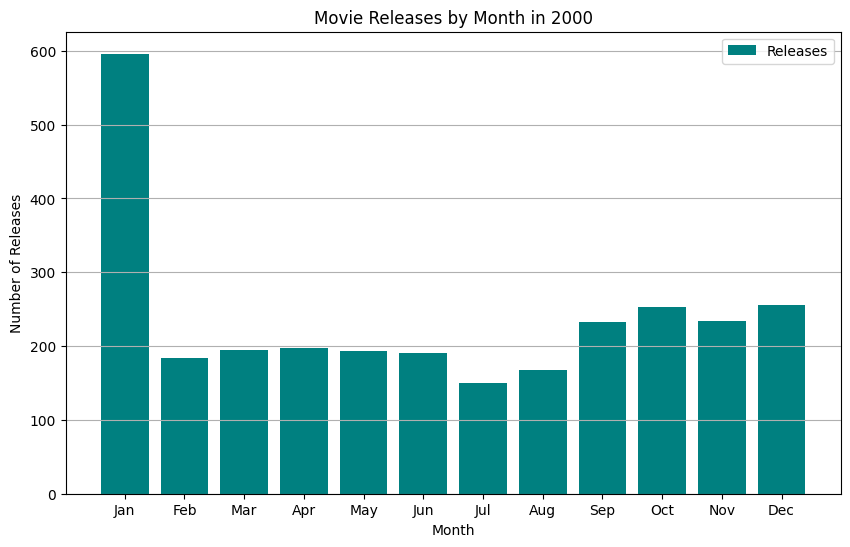

In [12]:
# Show how many films were released each month using a barplot
monthly_counts = pd.to_datetime(df_2000['release_date']).dt.month.value_counts().sort_index()
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
counts = [monthly_counts.get(i, 0) for i in range(1, 13)]

plt.figure(figsize=(10, 6))
plt.bar(range(1, 13), counts, color='teal', label='Releases')
plt.xlabel('Month')
plt.ylabel('Number of Releases')
plt.title('Movie Releases by Month in 2000')
plt.xticks(range(1, 13), months)
plt.grid(True, axis='y')
plt.legend()
plt.show()

### All movies

For the following questions, work with the dataframe `df_movies`.

Extract following information from the release date and store this in new columns:
    day of the week, day of the month, month, year

In [14]:
# Extract day of the week, day of the month, month, year from release date
df_movies['release_date'] = pd.to_datetime(df_movies['release_date'], errors='coerce')
df_movies['day_of_week'] = df_movies['release_date'].dt.day_name()
df_movies['day_of_month'] = df_movies['release_date'].dt.day
df_movies['month'] = df_movies['release_date'].dt.month
df_movies['year'] = df_movies['release_date'].dt.year
print(df_movies[['title', 'release_date', 'day_of_week', 'day_of_month', 'month', 'year']].head())

                title release_date day_of_week  day_of_month  month  year
0  Dancer in the Dark   2000-09-01      Friday             1      9  2000
1       Amores Perros   2000-06-16      Friday            16      6  2000
2         Talk to Her   2002-03-15      Friday            15      3  2002
3              8 Mile   2002-11-08      Friday             8     11  2002
4        Billy Elliot   2000-09-28    Thursday            28      9  2000


Create a new column `profit`, derived from subtracting the budget from the revenue. Remove all rows which do not contain valid revenue or budget data. Also create a column with booleans indicating wheter a film `is_profitable` (profit >0) or not.

In [15]:
# Create a new column `profit` and `is_profitable`
df_movies = df_movies.dropna(subset=['revenue', 'budget'])
df_movies = df_movies[(df_movies['revenue'] > 0) & (df_movies['budget'] > 0)]
df_movies['profit'] = df_movies['revenue'] - df_movies['budget']
df_movies['is_profitable'] = df_movies['profit'] > 0
print(df_movies[['title', 'revenue', 'budget', 'profit', 'is_profitable']].head())

                title      revenue      budget       profit  is_profitable
0  Dancer in the Dark   40061153.0  12500000.0   27561153.0           True
1       Amores Perros   20908467.0   2000000.0   18908467.0           True
3              8 Mile  242875078.0  41000000.0  201875078.0           True
4        Billy Elliot  109280263.0   5000000.0  104280263.0           True
5             Memento   40000000.0   9000000.0   31000000.0           True


**What are the top 10 most frequent genres?**

We are looking for the individual values, not the unique entries of genre combinations. It should be clear that you will have to do some data manipulations in order to get the answer.

To get you started: When analysing the video games dataset, we have seen a method to create separate rows (each with the same index) to represent multiple values of a column. This method takes a list-like object as argument. 

Tip: tackle this assignment step by step.

In [16]:
# Assuming genres are comma-separated strings
genres_series = df_movies['genres'].str.split(', ', expand=True).stack()
top_genres = genres_series.value_counts().head(10)
print("Top 10 genres:")
print(top_genres)

Top 10 genres:
Drama              312
Comedy             245
Thriller           171
Romance            158
Action             155
Crime              121
Adventure           87
Mystery             63
Family              56
Science Fiction     52
Name: count, dtype: int64


**Number of actors and budget**


Plot the data so we can visually evaluate whether there seems a relation between the number of actors playing in a movie and the budget of the movie. Create a new_dataframe containing only the relevant columns. 

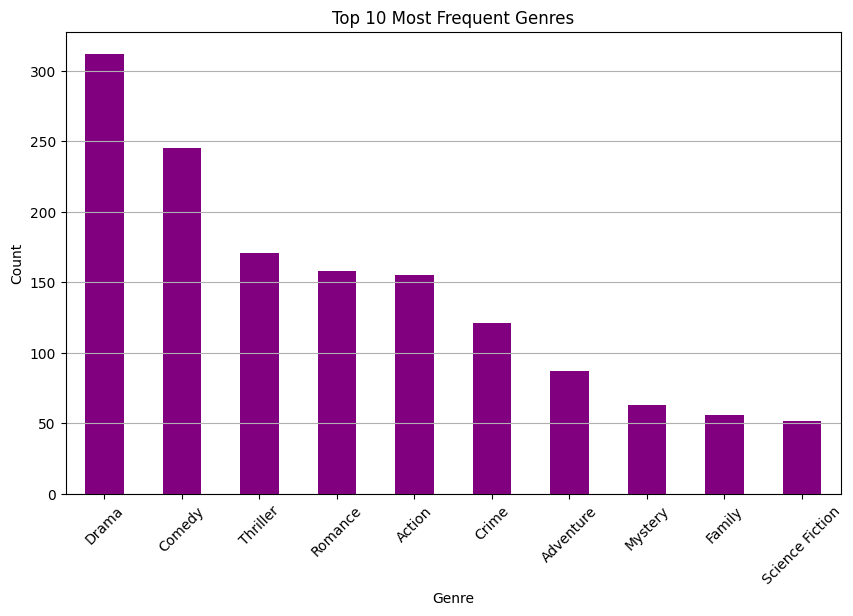

In [20]:
# Plot top genres
plt.figure(figsize=(10, 6))
top_genres.plot(kind='bar', color='purple')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Top 10 Most Frequent Genres')
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.show()

In [21]:
# Create new DataFrame with number of actors and budget
df_actors_budget = df_movies[['title', 'cast', 'budget']].copy()
df_actors_budget['num_actors'] = df_movies['cast'].str.split(', ').str.len()
df_actors_budget = df_actors_budget.dropna(subset=['num_actors', 'budget'])
df_actors_budget = df_actors_budget[df_actors_budget['budget'] > 0]

Create the same plot but now only containing the data of movies who's budget did not exceed 20 000 000.

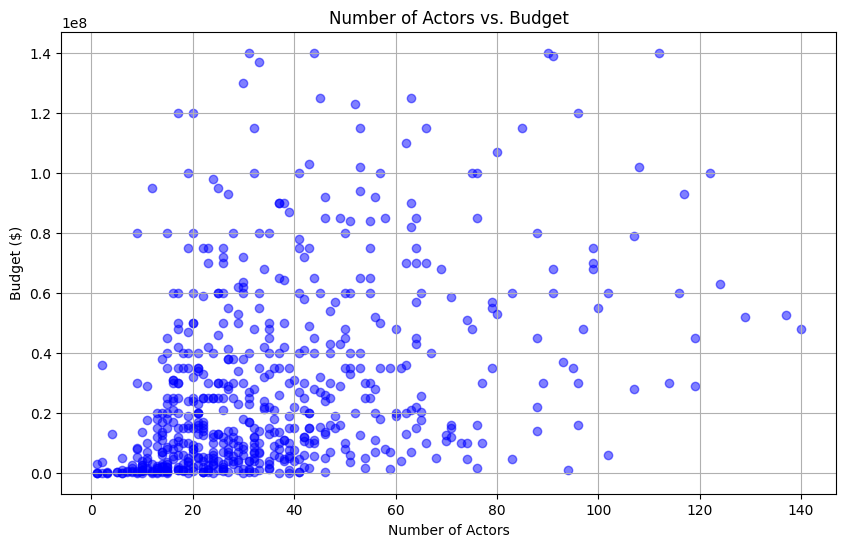

In [22]:
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_actors_budget['num_actors'], df_actors_budget['budget'], alpha=0.5, color='blue')
plt.xlabel('Number of Actors')
plt.ylabel('Budget ($)')
plt.title('Number of Actors vs. Budget')
plt.grid(True)
plt.show()

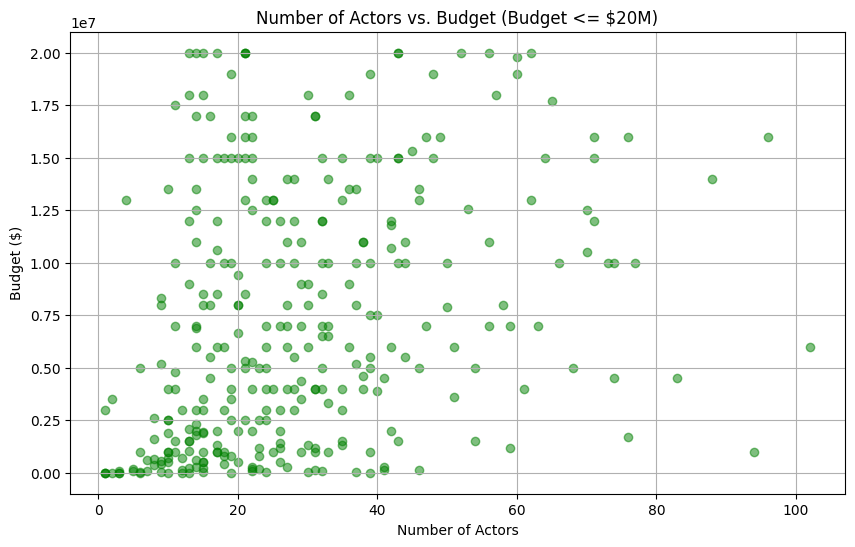

In [23]:
# Scatter plot for movies with budget <= 20,000,000
df_low_budget = df_actors_budget[df_actors_budget['budget'] <= 20000000]
plt.figure(figsize=(10, 6))
plt.scatter(df_low_budget['num_actors'], df_low_budget['budget'], alpha=0.5, color='green')
plt.xlabel('Number of Actors')
plt.ylabel('Budget ($)')
plt.title('Number of Actors vs. Budget (Budget <= $20M)')
plt.grid(True)
plt.show()

**Votes**


Show the total number of votes for the year with the most releases.

In [24]:
# Total number of votes for the year with the most releases
year_counts = df_movies['year'].value_counts()
most_releases_year = year_counts.idxmax()
total_votes = df_movies[df_movies['year'] == most_releases_year]['vote_count'].sum()
print(f"Year with most releases: {most_releases_year}")
print(f"Total votes for {most_releases_year}: {total_votes}")

Year with most releases: 2002
Total votes for 2002: 380054


More exercises? Feel free to explore the dataset further.